# Vector Decomposition with Python

This notebook will serve as an example on how to identify novel flow structures in a particular flow field using the PyPINS program. For this particular example, we will use a simple analytical expression for describing a flow field consisting of many different vortices, both in and out of the plane of the screen.

In [31]:
runImport = True
if runImport:
    import matplotlib.pyplot as plt
    import numpy as np
    import pypins as pp
    from skimage.color import rgb2gray
    from skimage.feature import blob_dog, blob_log, blob_doh
    from skimage import data

## Analytical Flow Field

In [32]:
#This create the simple vortex field that we will be using to evaluate different methods of decomposing flow fields
field = pp.analyticalField(spacing=10, nx=60, ny=60)

### Calculate the Curl of the Field

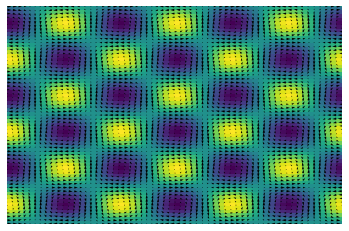

In [33]:
#Curl of the flow field
field.curl()

#Plot the field with the overlaying vectors
plt.pcolor(field.vectorCurl)
plt.quiver(field.meshX, field.meshY, field.vectorX, field.vectorY)
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Calculate the Divergence of the Field

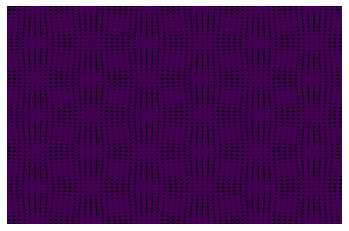

In [34]:
# Calculate the Divergence of the Flow Field
field.divergence()

#Plot the Divergence with the overlaying vectors of the field
plt.pcolor(field.vectorDivergence)
plt.quiver(field.meshX, field.meshY, field.vectorX, field.vectorY)
plt.xlim(0, field.nx) ; plt.ylim(0, field.ny)
plt.axis('off')
plt.show()

### Calculate the Kinetic Energy of the Field

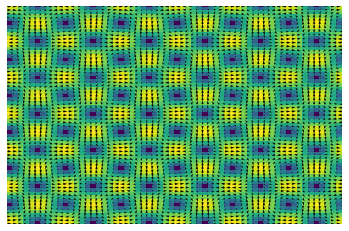

In [35]:
#Calculate the kinetic energy of the flow field
field.kineticEnergy()

#Plot the kinetic energy scalar field with the overlaying vectors of the field
plt.pcolor(field.vectorEnergy)
plt.quiver(field.meshX, field.meshY, field.vectorX, field.vectorY)
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Calculate the Galilean Decomposition of the Field

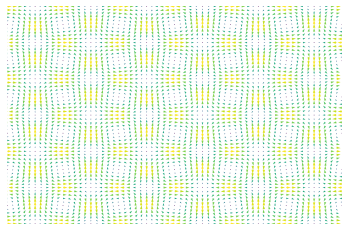

In [36]:
#Calculate the Galilean decomposition of the flow field
field.galileanDecomp(varValue=0.3)

#Plot the Galilean Decomposition of the Flow Field
plt.quiver(field.meshX, field.meshY, field.galileanX, field.galileanY, 
           np.sqrt(field.galileanX**2 + field.galileanY**2))
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Calculate the Reynolds Decomposition of the Field

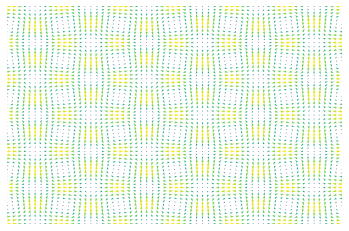

In [37]:
#Calculate the Reynolds Decomposition of the flow field
field.reynoldsDecomp()

#Plot the Reynolds Decomposition of the Flow Field
plt.quiver(field.meshX, field.meshY,
          field.reynoldsX, field.reynoldsY,
          np.sqrt(field.reynoldsX**2 + field.reynoldsY**2))
plt.xlim(0,field.nx) ; plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Calculate the Q-Criterion of the Field

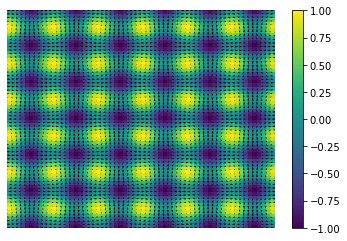

In [38]:
#Calculate the Q Criterion of the Flow Field
field.qCriterion()
field.criterionQ = (field.criterionQ - field.criterionQ.min())/(field.criterionQ.max()) - 1

#Plot the Q Criterion with the Overlaying Vectors
plt.pcolor(field.criterionQ)
plt.colorbar()
plt.quiver(field.meshX, field.meshY, field.vectorX, field.vectorY)
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Calculate the $\Delta$-Criterion of the Field

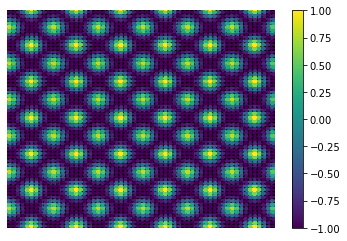

In [39]:
# Calculate the Delta Criterion of the Flow Field
field.deltaCriterion()
field.criterionDelta = 2*(field.criterionDelta - field.criterionDelta.min())/(field.criterionDelta.max()) - 1

#Plot the Delta Criterion of the Flow Field with Overlaying Vectors
plt.pcolor(field.criterionDelta)
plt.colorbar()
plt.quiver(field.meshX, field.meshY, field.vectorX, field.vectorY)
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Calculate the $\lambda$-Criterion of the Field

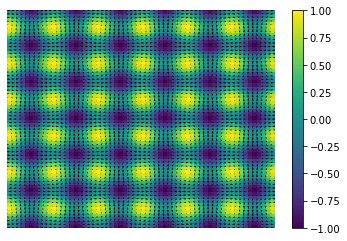

In [40]:
# Calculate the Lambda Criterion of the Flow Field
field.lambdaCriterion()
field.criterionLambda = (field.criterionLambda - field.criterionLambda.min())/(field.criterionLambda.max()) - 1

# Plot the Lambda Criterion of the Flow Field with Overlaying Vectors
plt.pcolor(field.criterionLambda)
plt.colorbar()
plt.quiver(field.meshX, field.meshY, field.vectorX, field.vectorY)
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Calculate the Helmholtz-Hodge Decomposition of the Field

In [41]:
field.helmholtzDecomposition()

### Display the Rotational Field

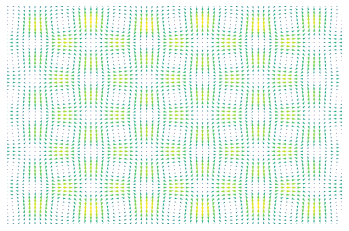

In [42]:
plt.quiver(field.meshX, field.meshY, field.rotationalField[:,:,0],field.rotationalField[:,:,1],
          np.sqrt(field.rotationalField[:,:,0]**2 + field.rotationalField[:,:,1]**2))
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Display the Harmonic Field

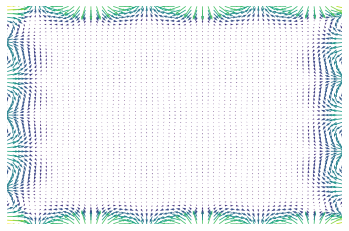

In [43]:
plt.quiver(field.meshX, field.meshY, field.harmonicField[:,:,0],field.harmonicField[:,:,1],
          np.sqrt(field.harmonicField[:,:,0]**2 + field.harmonicField[:,:,1]**2))
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Display the Rotation Free Field

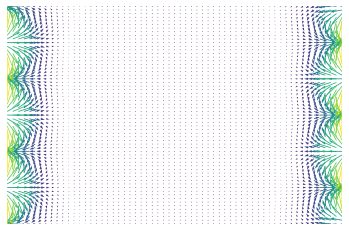

In [44]:
plt.quiver(field.meshX, field.meshY, field.divergenceField[:,:,0],field.divergenceField[:,:,1],
          np.sqrt(field.divergenceField[:,:,0]**2 + field.divergenceField[:,:,1]**2))
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

### Criterion Combinations

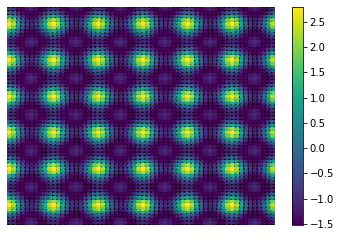

In [45]:
totalCriterion = field.criterionDelta + field.criterionLambda + field.criterionQ

plt.pcolor(totalCriterion)
plt.colorbar()
plt.quiver(field.meshX, field.meshY, field.vectorX, field.vectorY)
plt.xlim(0,field.nx); plt.ylim(0,field.ny)
plt.axis('off')
plt.show()

totalCriterion[totalCriterion > 1.00] = 1.0
totalCriterion[totalCriterion < 1.00] = 0.0

### Blob Detection via Different Decomposition Methods

We will now work to programmatically determine the number of blobs in a given image array. We would expect to see 42 Vortices/Blobs in each of our decomposition methods. Therefore, we will record the accuracy of each to how each decomposition method works in identifying vortices.

In [67]:
def blobDetection(imageArr, method='doh', funcMethod=''):
    from skimage.color import rgb2gray
    from skimage.feature import blob_dog, blob_log, blob_doh
    
    #Determine color panel of image arr
    if len(imageArr.shape) > 2:
        #This indicates a need to reformat the image to a gray scale image.
        print('Image is being reduced to gray scale')
        imageArr = rgb2gray(imageArr)
    else:
        print('Image is already in gray scale')
        
    print('Beginning Blob Detection using Method: {}'.format(method))
    
    if funcMethod != '':
        blobs = funcMethod(imageArr)
    else:
        if method == 'doh':
            blobs = blob_doh(imageArr)
        elif method == 'dog':
            blobs = blob_dog(imageArr)
            blobs[:,2] = blobs[:,2] * np.sqrt(2)
        elif method == 'log':
            blobs = blob_log(imageArr)
            blobs[:,2] = blobs[:,2] * np.sqrt(2)
            
    print('Imaging the blobs that were found using the {} Method'.format(method))
    
    fig, ax = plt.subplots(1,1,figsize=(10,6))
    ax.imshow(imageArr,cmap='binary')
    for blob in blobs:
        y,x,r = blob
        c = plt.Circle((x,y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()
    
    return fig, ax, len(blobs)

Image is already in gray scale
Beginning Blob Detection using Method: log
Imaging the blobs that were found using the log Method


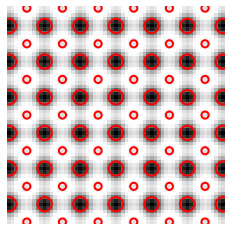

In [47]:
def testRun(imageArr):
    return blob_log(imageArr, max_sigma=10, threshold=0.03)

myFig, myAxis, blobCount = blobDetection(field.criterionQ + field.criterionDelta + field.criterionLambda,
                                         funcMethod=testRun, method='log')

In [ ]:
decompositions = [field.vectorCurl, field.vectorEnergy, field.criterionDelta, field.criterionLambda,
                 field.criterionQ]
titles = ['Vector Curl', 'Vector Energy', '$\Delta$-Criterion', '$\lambda$-Criterion', 'Q-Criterion']
methods = ['log', 'dog', 'doh']

dataDict = {}

for method in methods:
    for decomposition, title in zip(decompositions, titles):
        myF, myA, bCount = blobDetection(decomposition,method=method)
        dataDict['{}_{}'.format(method, title)] = bCount / 42
        

In [ ]:
dataDict

In [ ]:
plt.figure(figsize=[10,10])
plt.pcolor(field.vectorCurl, cmap='hot')
plt.quiver(field.vectorX[:,:],field.vectorY[:,:],color='b',
#            np.arctan2(field.vectorX[:,:], field.vectorY[:,:]),
           cmap='viridis',width=0.005, scale=30)
plt.axis('off')

## Discrete Flow Field

In [2]:
fileName = 'PELOOP.00030000.dat'

fileHandler = open(fileName, 'r')
dims = [int(var) for var in fileHandler.readline().split()]

px = np.zeros((dims[2],dims[1],dims[0]))
py = np.zeros((dims[2],dims[1],dims[0]))
pz = np.zeros((dims[2],dims[1],dims[0]))

for line in fileHandler.readlines():
    splitLine = line.split()
    px[int(splitLine[2])-1, int(splitLine[1])-1, int(splitLine[0])-1] = float(splitLine[3])
    py[int(splitLine[2])-1, int(splitLine[1])-1, int(splitLine[0])-1] = float(splitLine[4])
    pz[int(splitLine[2])-1, int(splitLine[1])-1, int(splitLine[0])-1] = float(splitLine[5])
    
fileHandler.close()

field = np.stack((px[:,1,:],pz[:,1,:]))
dField = pp.discreteField(field)
dField.assignVectors()

### Calculate the Curl

In [3]:
dField.curl()

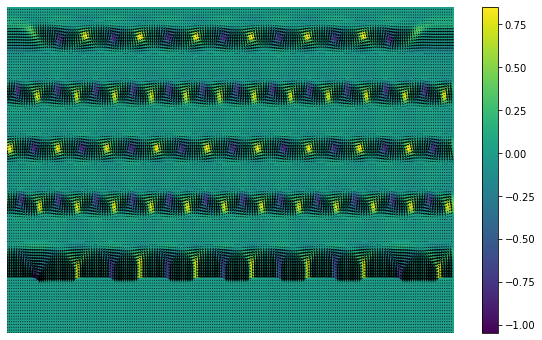

In [66]:
plt.figure(figsize=(10,6))
plt.pcolor(dField.vectorCurl)
plt.colorbar()
plt.quiver(dField.vectorX, dField.vectorY)
plt.axis('off')
plt.show()

### Calculate the Divergence

In [7]:
dField.divergence()

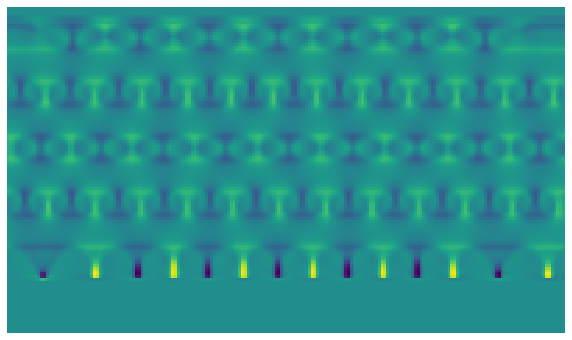

In [8]:
plt.figure(figsize=(10,6))
plt.pcolor(dField.vectorDivergence)
plt.axis('off')
plt.show()

### Calculate the Kinetic Energy of the Field

In [9]:
dField.kineticEnergy()

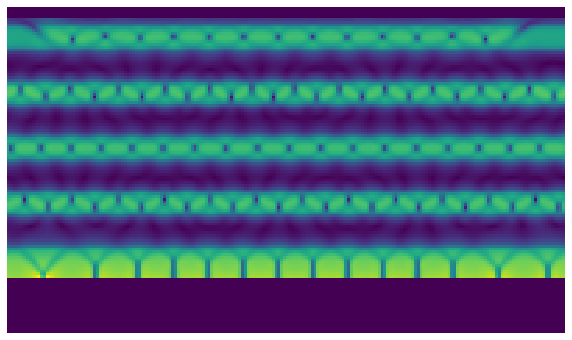

In [10]:
plt.figure(figsize=(10,6))
plt.pcolor(dField.vectorEnergy)
plt.axis('off')
plt.show()

### Calculate Reynolds Decomposition

In [11]:
dField.reynoldsDecomp()

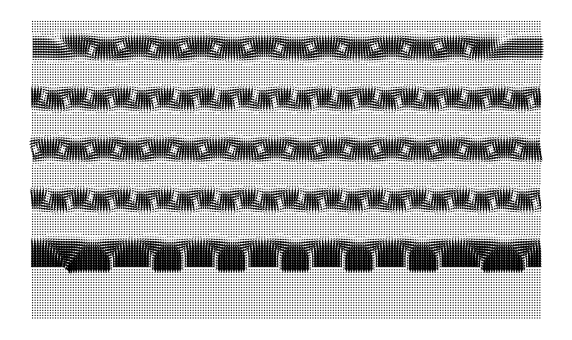

In [12]:
plt.figure(figsize=[10,6])
plt.quiver(dField.reynoldsX, dField.reynoldsY)
plt.axis('off')
plt.show()

### Calculate Galilean Decomposition

In [13]:
dField.galileanDecomp()

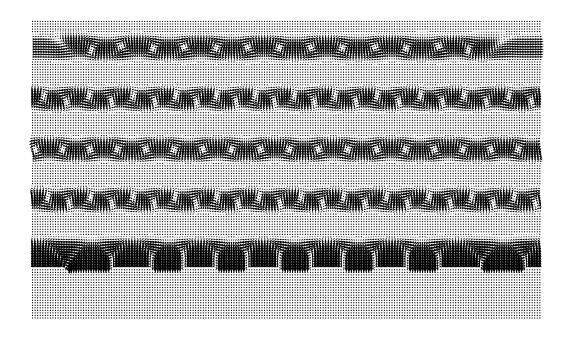

In [14]:
plt.figure(figsize=[10,6])
plt.quiver(dField.galileanX, dField.galileanY)
plt.axis('off')
plt.show()

### Calculate Q-Criterion

In [15]:
dField.qCriterion()

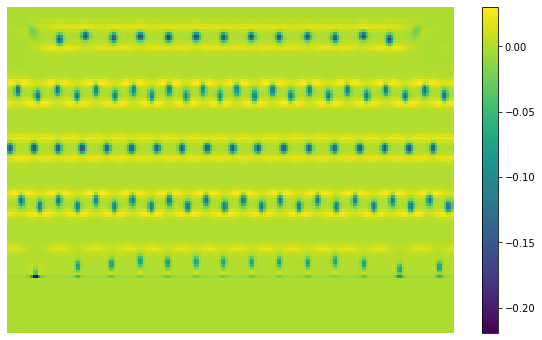

In [56]:
plt.figure(figsize=[10,6])
plt.pcolor(dField.criterionQ)
plt.axis('off')
plt.colorbar()
plt.show()

### Calculate $\lambda$-Criterion

In [17]:
dField.lambdaCriterion()

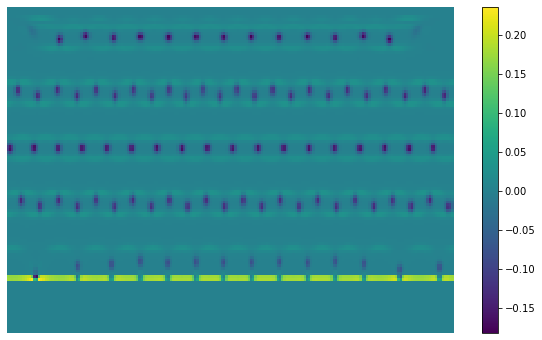

In [57]:
plt.figure(figsize=[10,6])
plt.pcolor(dField.criterionLambda)
plt.axis('off')
plt.colorbar()
plt.show()

### Calculate $\Delta$-Criterion

In [20]:
dField.deltaCriterion()

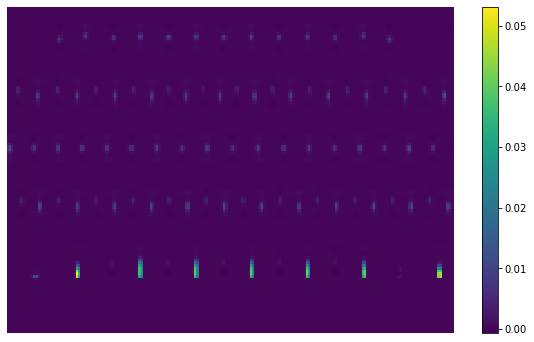

In [58]:
plt.figure(figsize=[10,6])
plt.pcolor(dField.criterionDelta)
plt.axis('off')
plt.colorbar()
plt.show()

### Calculate the Helmholtz-Hodge Decomposition

In [22]:
dField.helmholtzDecomposition()

### Display the Rotational Field

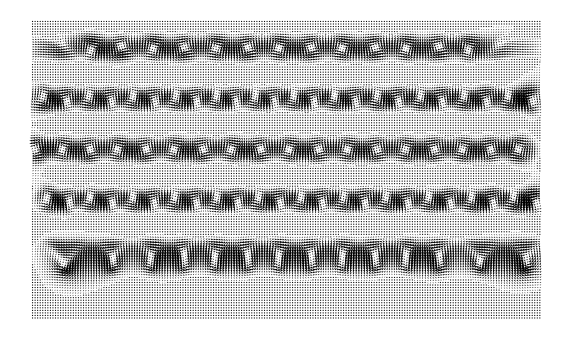

In [23]:
plt.figure(figsize=[10,6])
plt.quiver(dField.rotationalField[:,:,0], dField.rotationalField[:,:,1])
plt.axis('off')
plt.show()

### Display the Harmonic Field

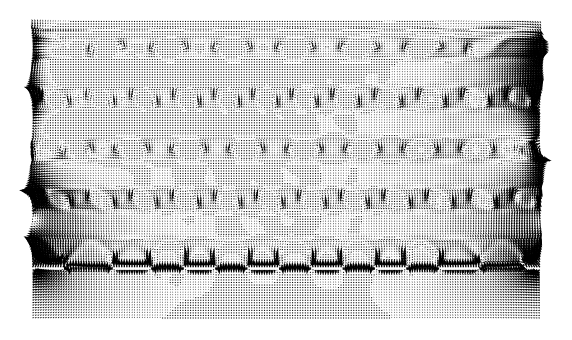

In [25]:
plt.figure(figsize=[10,6])
plt.quiver(dField.harmonicField[:,:,0], dField.harmonicField[:,:,1])
plt.axis('off')
plt.show()

### Display the Rotation Free Field

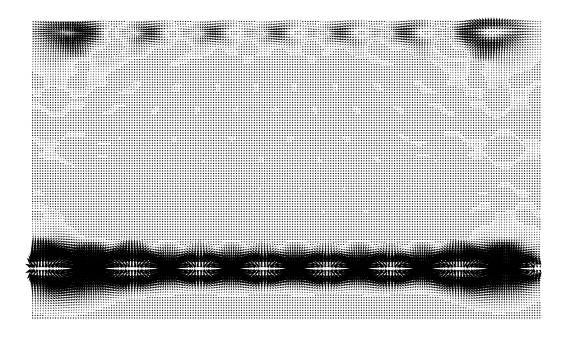

In [26]:
plt.figure(figsize=[10,6])
plt.quiver(dField.divergenceField[:,:,0], dField.divergenceField[:,:,1])
plt.axis('off')
plt.show()

### Criterion Combinations

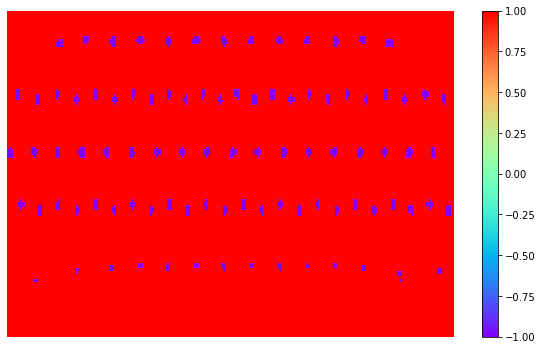

In [62]:
totalCriterion = dField.criterionDelta + dField.criterionLambda + dField.criterionQ

totalCriterion[totalCriterion < -0.1] = -1.0
totalCriterion[totalCriterion > -0.1] = 1.0

plt.figure(figsize=[10,6])
plt.pcolor(totalCriterion, cmap='rainbow')
plt.colorbar()
# plt.quiver(dField.vectorX, dField.vectorY)
plt.axis('off')
plt.show()

### Blob Detection via Different Decompositions